In [1]:
#Logistic Regression
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
!pip install "pandas<2.0.0"

from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFECV

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
                                                  

In [2]:
data_for_model = pickle.load(open(r"C:\Users\19144\OneDrive\Desktop\Data Science Infinity\Python Fundamentals\Pickle files\abc_classification_modelling.p", "rb")) #rb for reading a file in


In [3]:
data_for_model

,customer_id,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,1,3.38,F,0.59,1586.89,195,26,5,61.034231
1,524,1,4.76,F,0.52,2397.26,258,27,5,88.787407
2,607,1,4.45,F,0.49,1279.91,183,22,5,58.177727
3,343,0,0.91,M,0.54,967.14,102,17,5,56.890588
4,322,1,3.02,F,0.63,1566.35,182,30,5,52.211667
...,...,...,...,...,...,...,...,...,...,...
855,372,1,4.38,F,0.50,1381.28,103,12,5,115.106667
856,104,1,2.36,F,0.63,1464.62,127,22,5,66.573636
857,393,1,1.87,M,0.59,2213.97,191,38,5,58.262368
858,373,0,0.21,M,0.47,1446.00,133,22,5,65.727273


In [4]:
data_for_model

,customer_id,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,1,3.38,F,0.59,1586.89,195,26,5,61.034231
1,524,1,4.76,F,0.52,2397.26,258,27,5,88.787407
2,607,1,4.45,F,0.49,1279.91,183,22,5,58.177727
3,343,0,0.91,M,0.54,967.14,102,17,5,56.890588
4,322,1,3.02,F,0.63,1566.35,182,30,5,52.211667
...,...,...,...,...,...,...,...,...,...,...
855,372,1,4.38,F,0.50,1381.28,103,12,5,115.106667
856,104,1,2.36,F,0.63,1464.62,127,22,5,66.573636
857,393,1,1.87,M,0.59,2213.97,191,38,5,58.262368
858,373,0,0.21,M,0.47,1446.00,133,22,5,65.727273


In [5]:
data_for_model.drop("customer_id", axis=1, inplace=True) #True so that it is applied


In [6]:
#Shuffle data
#Best practice step
#This aids us in being sensitive to how data is organized - it may or may not have an impact on the model itself
data_for_model = shuffle(data_for_model, random_state=42)

In [7]:
#Class Balance - we need to think about how label/DV is balanced here
data_for_model["signup_flag"].value_counts()

0    593
1    267
Name: signup_flag, dtype: int64

In [8]:
data_for_model["signup_flag"].value_counts(normalize=True)

0    0.689535
1    0.310465
Name: signup_flag, dtype: float64

In [9]:
data_for_model

,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381
...,...,...,...,...,...,...,...,...,...
71,0,0.07,M,0.57,746.15,133,24,5,31.089583
106,0,1.96,F,0.60,881.49,166,24,4,36.728750
270,0,1.59,M,0.50,319.37,85,17,5,18.786471
435,0,0.71,F,0.54,273.94,74,20,4,13.697000


In [10]:
#Dealing with missing values
data_for_model.isna().sum()

signup_flag             0
distance_from_store     5
gender                  5
credit_score            8
total_sales             0
total_items             0
transaction_count       0
product_area_count      0
average_basket_value    0
dtype: int64

In [11]:
data_for_model.dropna(how = "any", inplace=True) #If any missing values, then whole row is dropped, True so that it is applied

In [12]:
data_for_model.shape

(847, 9)

In [13]:
#Deal with outliers
outlier_investigation = data_for_model.describe()

In [14]:
outlier_investigation

,signup_flag,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,0.304604,2.614545,0.597521,968.166411,143.877214,22.214876,4.177096,38.034161
std,0.460512,14.397590,0.102264,1073.647531,125.342694,11.721699,0.920887,24.243691
min,0.000000,0.000000,0.260000,2.090000,1.000000,1.000000,1.000000,2.090000
25%,0.000000,0.730000,0.530000,383.940000,77.000000,16.000000,4.000000,21.734700
50%,0.000000,1.640000,0.590000,691.640000,123.000000,23.000000,4.000000,31.069333
75%,1.000000,2.920000,0.670000,1121.530000,170.500000,28.000000,5.000000,46.429973
max,1.000000,400.970000,0.880000,7372.060000,910.000000,75.000000,5.000000,141.054091


In [15]:
#Approach 1 - Boxplot approach

outlier_columns = ["distance_from_store", "total_sales", "total_items"]

for column in outlier_columns:
    lower_quartile = data_for_model[column].quantile(0.25) #25 percentile/lower quartile
    upper_quartile = data_for_model[column].quantile(0.75) #25 percentile/lower quartile
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr*2 #Widened from 1.5 because I don't want to cut out too many outliers
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    
    outliers = data_for_model[(data_for_model[column] < min_border) | (data_for_model[column] > max_border)].index

    print(f"{len(outliers)} outliers detected in column {column}")
    
    data_for_model.drop(outliers, inplace =True)

8 outliers detected in column distance_from_store
54 outliers detected in column total_sales
3 outliers detected in column total_items


In [16]:
data_for_model

,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381
...,...,...,...,...,...,...,...,...,...
71,0,0.07,M,0.57,746.15,133,24,5,31.089583
106,0,1.96,F,0.60,881.49,166,24,4,36.728750
270,0,1.59,M,0.50,319.37,85,17,5,18.786471
435,0,0.71,F,0.54,273.94,74,20,4,13.697000


In [17]:
#We had 394 rows, now we are down to 369 rows

In [18]:
#Split input variables and output variables
X = data_for_model.drop(["signup_flag"], axis=1)
y = data_for_model["signup_flag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y) #stratify=y this means training and test sets have same proportion of 0s and 1s as overall data 

In [19]:
#Deal with categorical variables
categorical_vars = ["gender"]

one_hot_encoder = OneHotEncoder(sparse=False, drop="first") #Drop first encoded column to avoid dummy trap

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars]) #Want to use fit transform on training data, but transform only on test data 
#Want encoding rules learned on training, and then applied on testing - rules will remain the same
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars]) 

encoder_feature_names = one_hot_encoder.get_feature_names_out(input_features=categorical_vars)

# Run for x_train
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_train.drop(categorical_vars, axis=1, inplace=True)

# Run for x_test
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)
X_test.drop(categorical_vars, axis=1, inplace=True)


C:\Users\19144\anaconda4\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
X_train #gender is now binary 1s and 0s, and we only have gender_M because of the dummy variable trap

,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,0.07,0.57,746.15,133,24,5,31.089583,1.0
1,0.20,0.57,585.46,128,32,4,18.295625,1.0
2,3.07,0.53,1151.24,226,35,5,32.892571,0.0
3,2.86,0.77,14.03,8,2,2,7.015000,0.0
4,0.52,0.52,656.48,121,16,3,41.030000,1.0
...,...,...,...,...,...,...,...,...
620,0.39,0.72,564.47,146,25,4,22.578800,1.0
621,1.62,0.72,793.91,171,20,3,39.695500,1.0
622,2.60,0.65,847.01,123,22,5,38.500455,0.0
623,0.36,0.45,924.07,189,20,3,46.203500,1.0


In [21]:
#Feature Selection
clf = LogisticRegression(random_state=42, max_iter=1000) #max_iter - number of iterations to find optimal regression line
feature_selector = RFECV(clf)
#By default, cross validation uses 5 chunks of data to analyze
#Cross validation  - split into 5, training on model on 4, and validating model on remaining chunk
#Powerful way to validate model

fit = feature_selector.fit(X_train,y_train) #These are objects that have had our data prep applied to

optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

X_train = X_train.loc[:, feature_selector.get_support()]
X_test = X_test.loc[:, feature_selector.get_support()]
#6 optimal variables 
#Through cross validation - input3 and input4 were not useful here



Optimal number of features: 7


In [22]:
X_train #Looks like total sales has been dropped here

,distance_from_store,credit_score,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,0.07,0.57,133,24,5,31.089583,1.0
1,0.20,0.57,128,32,4,18.295625,1.0
2,3.07,0.53,226,35,5,32.892571,0.0
3,2.86,0.77,8,2,2,7.015000,0.0
4,0.52,0.52,121,16,3,41.030000,1.0
...,...,...,...,...,...,...,...
620,0.39,0.72,146,25,4,22.578800,1.0
621,1.62,0.72,171,20,3,39.695500,1.0
622,2.60,0.65,123,22,5,38.500455,0.0
623,0.36,0.45,189,20,3,46.203500,1.0


Text(0.5, 1.0, 'Feature Selection using RFE \n Optimal number of features is 7 (at score of 0.904)')

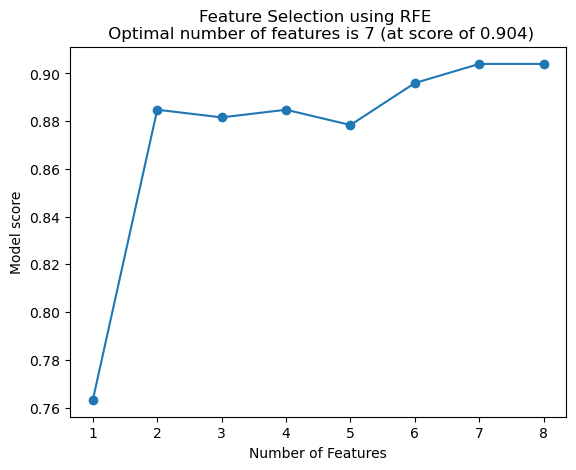

In [23]:
plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), fit.cv_results_['mean_test_score'], marker="o")
plt.ylabel("Model score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.cv_results_['mean_test_score']), 4)})")



In [24]:
#Model Training
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [25]:
#Model assessment
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test) #predicted probabilties



In [26]:
y_pred_class #This is full of 0s and 1s depending on which class data point is predicted to be in

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [27]:
y_pred_prob
#Probabilities that each data point belongs in either class

array([[9.90025644e-01, 9.97435557e-03],
       [8.33286915e-01, 1.66713085e-01],
       [2.20986295e-01, 7.79013705e-01],
       [9.48684655e-01, 5.13153450e-02],
       [9.95111371e-01, 4.88862888e-03],
       [6.82460453e-02, 9.31753955e-01],
       [9.99971453e-01, 2.85469467e-05],
       [9.52301634e-01, 4.76983660e-02],
       [9.99990720e-01, 9.27984429e-06],
       [9.99836307e-01, 1.63692538e-04],
       [9.59591940e-01, 4.04080604e-02],
       [9.86343486e-01, 1.36565142e-02],
       [9.97101216e-01, 2.89878419e-03],
       [9.43406098e-01, 5.65939021e-02],
       [9.87485375e-01, 1.25146247e-02],
       [5.67716252e-01, 4.32283748e-01],
       [9.89462267e-01, 1.05377332e-02],
       [9.99623027e-01, 3.76973339e-04],
       [9.92855496e-01, 7.14450377e-03],
       [9.38536968e-01, 6.14630321e-02],
       [3.87293447e-01, 6.12706553e-01],
       [2.53043807e-01, 7.46956193e-01],
       [2.53281769e-01, 7.46718231e-01],
       [4.11027054e-01, 5.88972946e-01],
       [9.991408

In [28]:
#We need just prob of consumer being in class 1 = positive
y_pred_prob = clf.predict_proba(X_test)[:,1]
y_pred_prob

array([9.97435557e-03, 1.66713085e-01, 7.79013705e-01, 5.13153450e-02,
       4.88862888e-03, 9.31753955e-01, 2.85469467e-05, 4.76983660e-02,
       9.27984429e-06, 1.63692538e-04, 4.04080604e-02, 1.36565142e-02,
       2.89878419e-03, 5.65939021e-02, 1.25146247e-02, 4.32283748e-01,
       1.05377332e-02, 3.76973339e-04, 7.14450377e-03, 6.14630321e-02,
       6.12706553e-01, 7.46956193e-01, 7.46718231e-01, 5.88972946e-01,
       8.59165003e-04, 2.36009399e-03, 6.03938394e-03, 3.07437530e-01,
       1.52514790e-01, 1.33627348e-01, 8.33507022e-01, 9.99452671e-01,
       2.37863831e-01, 1.63861470e-02, 9.49478287e-02, 4.78548436e-05,
       9.84231621e-01, 1.36961355e-01, 1.54225968e-04, 6.26103049e-01,
       6.59970946e-04, 9.03728258e-03, 1.80268814e-02, 3.77351004e-01,
       1.92020530e-02, 2.20760562e-02, 8.56201205e-01, 2.09236481e-02,
       3.56185044e-02, 1.16270418e-02, 1.28741759e-01, 2.07922707e-01,
       6.39081940e-01, 1.33838220e-01, 2.16942903e-01, 1.35332193e-02,
      

C:\Users\19144\AppData\Local\Temp\ipykernel_13688\1092678375.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


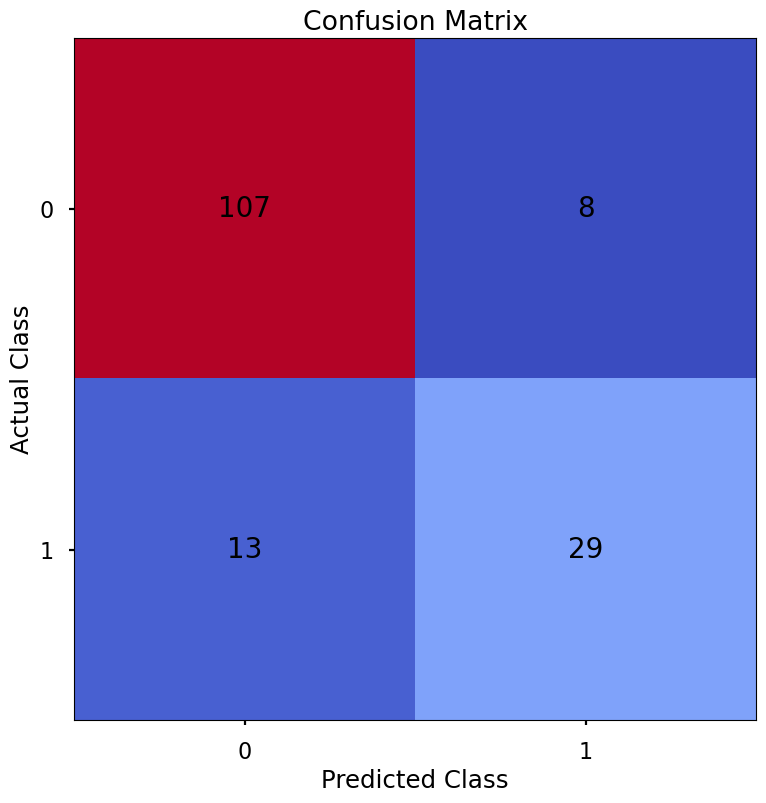

In [29]:
#Confusion matrix

conf_matrix = confusion_matrix(y_test,y_pred_class)

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap="coolwarm")
plt.gca().xaxis.tick_bottom()#Moves text from top of chart to the bottom
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j, i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show()

In [30]:
#Accuracy (the numebr of correct classification out of all attempted classifications)
accuracy_score(y_test,y_pred_class)

0.8662420382165605

In [31]:
#Classification accuracy score of 86.6%
#But slight imbalance in data set

#Precision (of all observations that were predicted as positive, how many were actually positive)
precision_score(y_test,y_pred_class)
#Each time we predicted a positive class, we were right 78% of the time

0.7837837837837838

In [32]:
#Recall (of all positive observations, how mayn did we predict as positive)
recall_score(y_test, y_pred_class)

#Out of all the actual positive cases, the model correctly identified 69% of them.

0.6904761904761905

In [33]:
#F1 score (the harmonic mean of precision and recall)
f1_score(y_test,y_pred_class)
#73.4% - this is important to measure, especially since data is imbalanced

0.7341772151898734

In [34]:
#Finding the optimal threshold
thresholds = np.arange(0,1, 0.01) #0-100%, increments of 0.01
thresholds #Loop through thresholds and test precision, recall, and f1 at each threshold

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [35]:
precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    pred_class = (y_pred_prob >= threshold) * 1
    
    precision = precision_score(y_test,pred_class,zero_division=0) #zero - no error messages 
    precision_scores.append(precision)
    
    recall = recall_score(y_test, pred_class)
    recall_scores.append(recall)
    
    f1 = f1_score(y_test,pred_class)
    f1_scores.append(f1)

In [36]:
max_f1 = max(f1_scores)
max_f1_idx = f1_scores.index(max_f1)

In [37]:
max_f1

0.7804878048780488

C:\Users\19144\AppData\Local\Temp\ipykernel_13688\1842802637.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


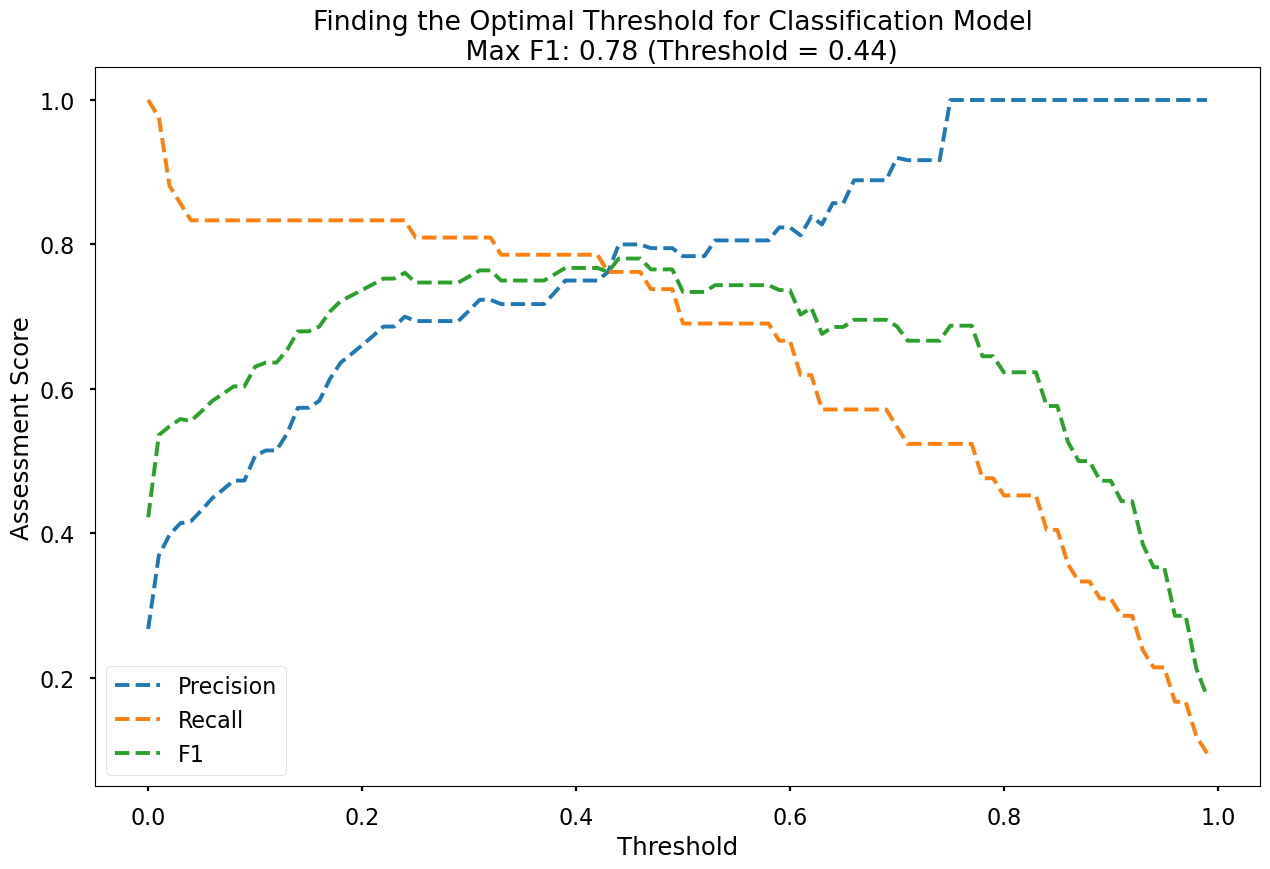

In [38]:
plt.style.use("seaborn-poster")
plt.plot(thresholds, precision_scores, label = "Precision", linestyle = "--")

plt.plot(thresholds, recall_scores, label = "Recall", linestyle = "--")

plt.plot(thresholds, f1_scores, label = "F1", linestyle = "--")

plt.title(f"Finding the Optimal Threshold for Classification Model \n Max F1: {round(max_f1,2)} (Threshold = {round(thresholds[max_f1_idx],2)})")
plt.xlabel("Threshold")
plt.ylabel("Assessment Score")
plt.legend(loc = "lower left")
plt.tight_layout()
plt.show()
#2 is used for rounding and controlling decimal points

#Ideal threshold is 0.44

In [39]:
optimal_threshold = 0.44
y_pred_class_opt_thres = (y_pred_prob >= optimal_threshold) *1
#Now object contains this

In [40]:
#Since we've figured out that 0.44 is the best classification threshold (in other words probabilities above 0.44 will be classified as 1, and probabilities below 0.44 will be classified as 0) we would want that to apply when we make predictions on new observations in the future.
#When running new predictions, we would extract the predicted probability and then put in place the logic so that this would be done.

In [41]:
#We may deploy code like this:
#probabilities = model.predict_proba(X_test)[:, 1]  # Get probabilities of the positive class
#predictions = (probabilities > 0.44).astype(int)  # Apply the 0.44 threshold